# 3. Feature Enginerring

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import KBinsDiscretizer
from statsmodels.api import Logit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import scorecardpy as sc
import warnings
from statsmodels.formula.api import logit
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
import os 
import sys
sys.path.append(os.path.join(os.path.abspath('..')))

In [43]:
import src.data_loading as dl
import scripts.feature_enigneering as fe
from scripts.logger import setup_logger
import src.visualizations as ve

In [5]:
#logger
logger = setup_logger('feature_engineering_logger', '../logs/fe.log')

In [6]:
output_data = '../data/processed'
df = pd.read_csv(output_data + '/processed_data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [7]:
# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], format='%Y-%m-%dT%H:%M:%SZ')

1. Create Aggregate Features

In [8]:
# Total transaction amount 
df['TotalTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('sum')

In [9]:
# Average Transaction Amount
# df['AverageTransactionAmount'] = df['CustomerId'].map(df.groupby('CustomerId')['Amount'].apply(lambda x: x.abs().mean()))

In [10]:
df['AverageTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('mean')

In [11]:
# Transaction Count
df['TransationCount'] = df.groupby('CustomerId')['TransactionId'].transform('count')

In [12]:
# df['Recency'] = (df['TransactionStartTime'] - df['CustomerId'].map(df.groupby('CustomerId')['TransactionStartTime'].max())).dt.days
# df['Recency'] = df['Recency'].apply(lambda x: abs(x))  # Use absolute value

Note that the std function will calculate the population standard deviation by default. So i want to calculate the sample standard deviation, so i can use the ddof parameter:

In [13]:
# Standard Deviation of Transaction Amounts
# df['StdTransactionAmount'] = df['CustomerId'].map(
#    df.groupby('CustomerId')['Amount'].apply(lambda x: x.abs().std()).fillna(0)
# )

In [14]:
df['StdTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('std').fillna(0)

In [15]:
#categorical and numerical columns into variables
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns

## 2. Extract Features

In [16]:
# Apply the function
fe.extract_features(df, ['TransactionStartTime'])

In [17]:
pd.set_option('display.max_columns', None)
df.sample(6)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransationCount,StdTransactionAmount,TransactionStartTime_Month,TransactionStartTime_Week,TransactionStartTime_Day,TransactionStartTime_Dayofweek,TransactionStartTime_Dayofyear,TransactionStartTime_Is_month_end,TransactionStartTime_Is_month_start,TransactionStartTime_Is_quarter_end,TransactionStartTime_Is_quarter_start,TransactionStartTime_Is_year_end,TransactionStartTime_Is_year_start,TransactionStartTime_Hour,TransactionStartTime_Minute,TransactionStartTime_Second,TransactionStartTime_Elapsed
76850,40171,56407,4841,3829,3535,UGX,256,4,6,financial_services,2,-50.0,50,2019-01-29 04:40:41,2,0,265434.0,2708.510204,98,6526.163945,1,5,29,1,29,False,False,False,False,False,False,4,40,41,1548736841
21808,61059,89215,4841,3829,2214,UGX,256,4,6,financial_services,2,-500.0,500,2018-12-09 17:43:23,2,0,1810259.0,12314.687075,147,62250.326093,12,49,9,6,343,False,False,False,False,False,False,17,43,23,1544377403
5091,22909,21624,2237,872,2649,UGX,256,3,10,airtime,3,2000.0,2000,2018-11-21 14:54:02,1,0,956870.0,2665.376045,359,6455.161401,11,47,21,2,325,False,False,False,False,False,False,14,54,2,1542812042
80980,47728,89866,1427,1124,1795,UGX,256,1,10,airtime,3,10000.0,10000,2019-02-01 11:23:04,4,0,39000.0,3900.000000,10,9122.012449,2,5,1,4,32,False,True,False,False,False,False,11,23,4,1549020184
53946,13799,136221,4249,4429,7343,UGX,256,4,10,airtime,2,-25000.0,25000,2019-01-08 11:26:53,4,0,-104900000.0,-25641.652408,4091,12952.599898,1,2,8,1,8,False,False,False,False,False,False,11,26,53,1546946813
75470,121403,11149,3362,2261,3795,UGX,256,5,3,airtime,3,2000.0,2000,2019-01-27 20:44:52,4,0,834542.0,8345.420000,100,27427.285125,1,4,27,6,27,False,False,False,False,False,False,20,44,52,1548621892


In [18]:
# Boolean to int 
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

## Encode Categorical Variables

In [19]:
# Group Aggregation
fe.encode_AG(df, 'CustomerId', ['Value'], ['mean','min','max','std'])

CustomerId_Value_mean , CustomerId_Value_min , CustomerId_Value_max , CustomerId_Value_std , 

In [20]:
# Combine Features
fe.encode_CB(df, 'ProductId', 'ProductCategory')

ProductId_ProductCategory , 

In [21]:
# Group Aggregation NUnique
# How many Transaction does each Customer made
fe.encode_AG2(df, 'CustomerId', ['TransactionId'])   

CustomerId_TransactionId_ct , 

In [22]:
# How many type of product are each customer used 
fe.encode_AG2(df, 'CustomerId', ['ProductId', 'ProductCategory'])

CustomerId_ProductId_ct , CustomerId_ProductCategory_ct , 

In [23]:
# Divide meanTransac by the current trans
df["Value_Mean_Ratio"] = df["Value"]/df["CustomerId_Value_mean"]
df["Value_Mean_Ratio"] = df["Value"]/df["CustomerId_Value_mean"]

In [24]:
# Subtract meanTransac by the current trans
df["Value_Mean_Minus"] = df["Value"]-df["CustomerId_Value_mean"]
df["Value_Mean_Minus"] = df["Value"]-df["CustomerId_Value_mean"]

In [25]:
df = fe.aggregate_data(['CustomerId', 'ProductId'], ['Value'], ['mean','min','max','std'], df, fillna=True, use_na=False)
df = fe.aggregate_data(['CustomerId', 'ProductCategory'], ['Value'], ['mean','min','max','std'], df, fillna=True, use_na=False)

'CustomerId_ProductId_Value_mean' , 'CustomerId_ProductId_Value_min' , 'CustomerId_ProductId_Value_max' , 'CustomerId_ProductId_Value_std' , 'CustomerId_ProductCategory_Value_mean' , 'CustomerId_ProductCategory_Value_min' , 'CustomerId_ProductCategory_Value_max' , 'CustomerId_ProductCategory_Value_std' , 

In [26]:
# Ratio of product_value mean to current value mean
df["CustomerId_ProductCategory_Value_Ratio"] = df["Value"]/df["CustomerId_ProductCategory_Value_mean"]
df["CustomerId_ProductCategory_Value_Ratio"] = df["Value"]/df["CustomerId_ProductCategory_Value_mean"]

# Ratio of product_value mean to current value mean
df["CustomerId_ProductId_Value_Ratio"] = df["Value"]/df["CustomerId_ProductId_Value_mean"]
df["CustomerId_ProductId_Value_Ratio"] = df["Value"]/df["CustomerId_ProductId_Value_mean"]

In [27]:
# Remove duplicate transaction because they have the same transaction id, and we will be able to track the timeframe for transactions
df.drop_duplicates(subset=['CustomerId','TransactionId'], keep='first', inplace=True)

In [28]:
# Frequency Encoding
# Get count of Customer
fe.encode_FE(df, ['CustomerId', 'TransactionId'])

CustomerId_FE , TransactionId_FE , 

In [29]:
#Label encode customer Id
fe.encode_LE(df, ['CustomerId'])

CustomerId , 

In [30]:
# Get mean/median number of times a customer makes a transaction, this will help to know the customers paying ability
df["meanTransactionPercustomer"] = df["CustomerId_FE"]/df["CustomerId_TransactionId_ct"] # count of customer per transaction id divide by 
df["meanTransactionPercustomer"] = df["CustomerId_FE"]/df["CustomerId_TransactionId_ct"]

In [31]:
# Label Encoding
fe.encode_LE(df, ['ProductCategory', 'ProductId', 'SubscriptionId', 'CurrencyCode', 'CountryCode'
                  , 'ProviderId', 'ChannelId', 'PricingStrategy'])

ProductCategory , ProductId , SubscriptionId , CurrencyCode , CountryCode , ProviderId , ChannelId , PricingStrategy , 

In [32]:
pd.set_option('display.max_columns', None)
df.sample(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransationCount,StdTransactionAmount,TransactionStartTime_Month,TransactionStartTime_Week,TransactionStartTime_Day,TransactionStartTime_Dayofweek,TransactionStartTime_Dayofyear,TransactionStartTime_Is_month_end,TransactionStartTime_Is_month_start,TransactionStartTime_Is_quarter_end,TransactionStartTime_Is_quarter_start,TransactionStartTime_Is_year_end,TransactionStartTime_Is_year_start,TransactionStartTime_Hour,TransactionStartTime_Minute,TransactionStartTime_Second,TransactionStartTime_Elapsed,CustomerId_Value_mean,CustomerId_Value_min,CustomerId_Value_max,CustomerId_Value_std,ProductId_ProductCategory,CustomerId_TransactionId_ct,CustomerId_ProductId_ct,CustomerId_ProductCategory_ct,Value_Mean_Ratio,Value_Mean_Minus,CustomerId_ProductId_Value_mean,CustomerId_ProductId_Value_min,CustomerId_ProductId_Value_max,CustomerId_ProductId_Value_std,CustomerId_ProductCategory_Value_mean,CustomerId_ProductCategory_Value_min,CustomerId_ProductCategory_Value_max,CustomerId_ProductCategory_Value_std,CustomerId_ProductCategory_Value_Ratio,CustomerId_ProductId_Value_Ratio,CustomerId_FE,TransactionId_FE,meanTransactionPercustomer
53744,78722,137945,4249,3310,3663,0,0,3,9,0,1,-30000.0,30000,2019-01-08 11:13:57,3,0,-104900000.0,-25641.652408,4091,12952.599898,1,2,8,1,8,0,0,0,0,0,0,11,13,57,1546946037,25641.652344,5000.0,200000.0,12952.599609,10_airtime,4091.0,4.0,1.0,1.169971,4358.347656,23365.529208,5000,110000,11548.758991,25641.652408,5000,200000,12952.599898,1.169971,1.283943,8182.0,2.0,2.0
73103,20677,103040,4841,2867,3549,0,0,3,5,2,1,-5000.0,5000,2019-01-25 18:31:37,2,0,70000.0,5000.000000,14,6275.716324,1,4,25,4,25,0,0,0,0,0,0,18,31,37,1548441097,7285.714355,1000.0,10000.0,3023.715820,6_financial_services,14.0,3.0,2.0,0.686275,-2285.714355,4000.000000,1000,5000,2000.000000,7000.000000,1000,10000,3464.101615,0.714286,1.250000,28.0,2.0,2.0
58684,117559,92857,1959,1085,1446,0,0,2,14,2,2,100000.0,100000,2019-01-12 16:35:42,2,0,6279578.0,114174.145455,55,171597.525210,1,2,12,5,12,0,0,0,0,0,0,16,35,42,1547310942,114544.945312,56.0,800000.0,171403.562500,15_financial_services,55.0,9.0,4.0,0.873020,-14544.945312,162945.945946,5000,800000,191052.631775,134102.711111,56,800000,183847.010062,0.745697,0.613700,110.0,2.0,2.0


In [33]:
# Define the columns to apply PCA on
col_start = ['Value', 'Amount', 'ProductId', 'ProductCategory',
             'CustomerId_TransactionId_ct',
             'AverageTransactionAmount',
             'CustomerId_Value_mean', 'CustomerId_Value_min',
             'CustomerId_Value_max', 'CustomerId_Value_std',
             'CustomerId_ProductId_ct', 'CustomerId_ProductCategory_ct',
             'CustomerId_FE', 'TransactionId_FE',
             'Value_Mean_Ratio', 'Value_Mean_Minus', 'ProductId_ProductCategory',
             'CustomerId_ProductId_Value_mean', 'CustomerId_ProductId_Value_min',
             'CustomerId_ProductId_Value_max', 'CustomerId_ProductId_Value_std',
             'CustomerId_ProductCategory_Value_mean',
             'CustomerId_ProductCategory_Value_min',
             'CustomerId_ProductCategory_Value_max',
             'CustomerId_ProductCategory_Value_std',
             'CustomerId_ProductCategory_Value_Ratio',
             'CustomerId_ProductId_Value_Ratio',
             'TransactionStartTime_Month',
             'TransactionStartTime_Week', 'TransactionStartTime_Day',
             'TransactionStartTime_Dayofweek', 'TransactionStartTime_Dayofyear',
             'TransactionStartTime_Is_month_end', 'TransactionStartTime_Is_month_start',
             'TransactionStartTime_Is_quarter_end', 'TransactionStartTime_Is_quarter_start',
             'TransactionStartTime_Is_year_end', 'TransactionStartTime_Is_year_start', 
             'TransactionStartTime_Hour', 'TransactionStartTime_Minute', 
             'TransactionStartTime_Second','TransactionStartTime_Elapsed',
             'TransactionStartTime_Month', 'TransactionStartTime_Day', 'TransactionStartTime_Hour'
            ]

# Split the columns into numerical and categorical
num_cols = [col for col in col_start if df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in col_start if df[col].dtype == 'object']

# One-hot encode the categorical columns
encoder = OneHotEncoder()
ohe_data = encoder.fit_transform(df[cat_cols])
ohe_df = pd.DataFrame(ohe_data.toarray())

# Combine the numerical and one-hot encoded columns
combined_df = pd.concat([df[num_cols], ohe_df], axis=1)

# Convert column names to strings
combined_df.columns = combined_df.columns.astype(str)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_df)

# Apply PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create new columns for the principal components
df[['pc1', 'pc2', 'pc3']] = X_pca

# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=1996)
kmeans.fit(X_scaled)
df['kmeans'] = kmeans.labels_

## Task 3: Default estimator and WoE binning 

#### Step 1: Construct a default estimator (proxy)
* Calculate the RFMS scores for each customer
* Use the RFMS scores to classify customers into high and low risk groups

In [34]:
# Calculate RFMS scores
rfms_scores = fe.rfms_score(df)
print("\nRFMS scores:")
rfms_scores.head()
logger.info("RFM Scores are calculated")


RFMS scores:


In [35]:
rfms_scores.columns

Index(['Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg',
       'Recency_Normalized', 'Frequency_Normalized',
       'MonetaryTotal_Normalized', 'MonetaryAvg_Normalized', 'RFMS_Score'],
      dtype='object')

#### Step 2: Visualize all transactions in the RFMS space

* Use a 3D scatter plot to visualize all transactions in the RFMS space
* Use the RFMS scores to color the points in the plot

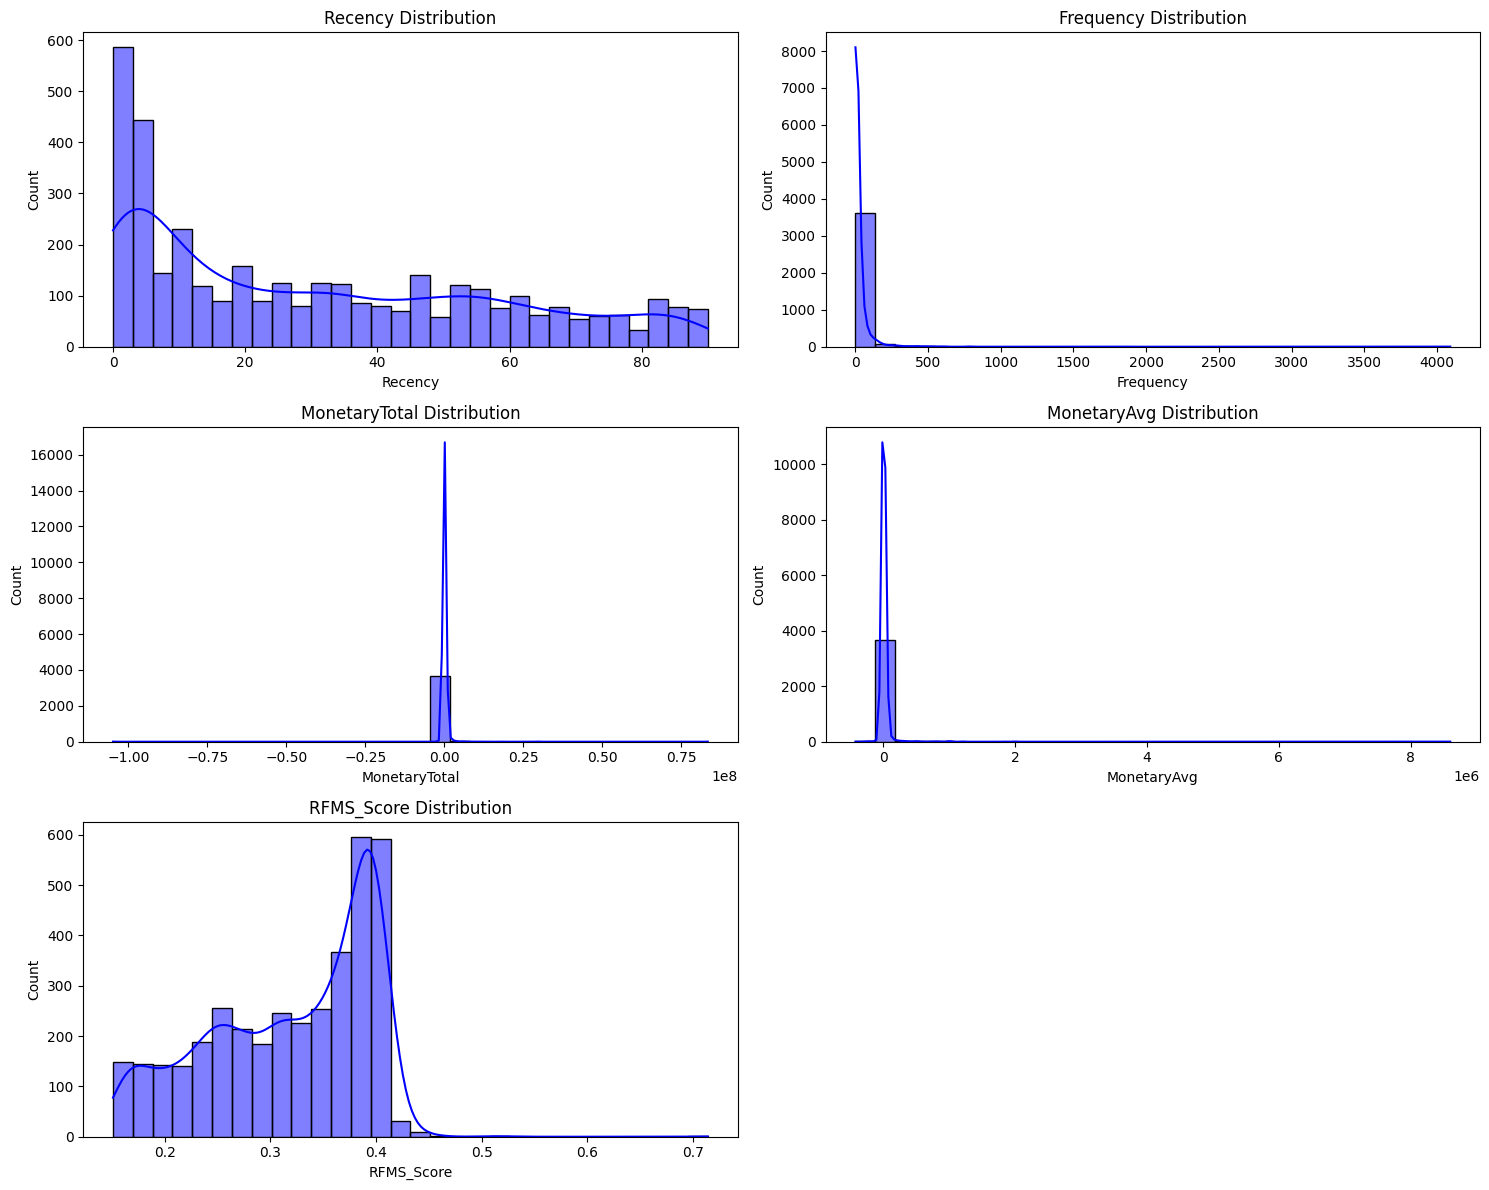

In [36]:
def plot_rfms_distributions(customer_metrics):
    plt.figure(figsize=(15, 12))
    
    metrics = ['Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg', 'RFMS_Score']
    for i, metric in enumerate(metrics, 1):
        plt.subplot(3, 2, i)
        sns.histplot(customer_metrics[metric], kde=True, bins=30, color='blue')
        plt.title(f'{metric} Distribution')
        plt.xlabel(metric)
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

plot_rfms_distributions(rfms_scores)

#### Step 3: Establish a boundary where users are classified as high and low RFMS scores

* Use the RFMS scores to establish a boundary where users are classified as high and low risk
* Use the quantile function to find the boundary

In [37]:
# Assign good/bad labels
df = fe.assign_good_bad_label(df, rfms_scores)
logger.info(" labels is assigned based on RFMS_Score")
print("\nAfter assigning good/bad labels:")
print(df[['CustomerId', 'RFMS_Score', 'label']].drop_duplicates().head(10))



After assigning good/bad labels:
    CustomerId  RFMS_Score label
0         2991    0.408389  good
2         3195    0.176081   bad
3          488    0.389848   bad
5          809    0.151063   bad
6         1815    0.389041   bad
8          212    0.156810   bad
9          531    0.154222   bad
10        1973    0.232272   bad
16        2011    0.413342  good
19        2331    0.290530   bad


In [38]:
df = df.merge(rfms_scores[['Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg']], left_on='CustomerId', right_index=True, how='left')

#### Step 4: Assign all users the good and bad label

* Use the RFMS_Score column to assign a good or bad label to each user
* Use the apply function to assign the labels

In [39]:
# Display RFMS values along with RFM_Score and risk label
df[['CustomerId', 'Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg', 'RFMS_Score', 'label']].head(10)

,CustomerId,Recency,Frequency,MonetaryTotal,MonetaryAvg,RFMS_Score,label
0,2991,0,119,109921.75,923.712185,0.408389,good
1,2991,0,119,109921.75,923.712185,0.408389,good
2,3195,81,2,1000.00,500.000000,0.176081,bad
3,488,5,38,228727.20,6019.136842,0.389848,bad
4,488,5,38,228727.20,6019.136842,0.389848,bad
5,809,90,1,2000.00,2000.000000,0.151063,bad
6,1815,5,29,93400.00,3220.689655,0.389041,bad
7,1815,5,29,93400.00,3220.689655,0.389041,bad
8,212,88,4,8060.00,2015.000000,0.156810,bad
9,531,89,7,13788.00,1969.714286,0.154222,bad


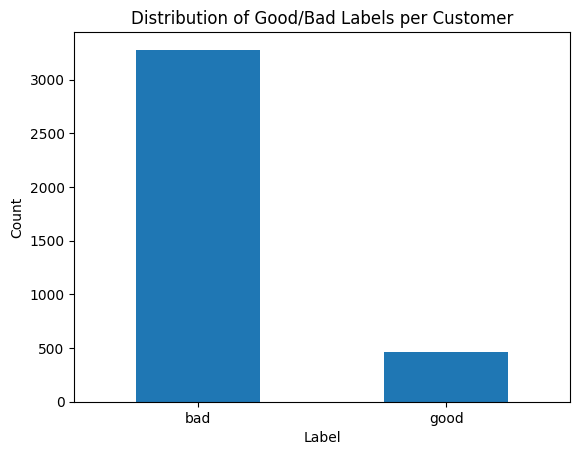

In [40]:
# Get the counts of each label
label_counts = df[['CustomerId', 'label']].drop_duplicates()['label'].value_counts()

# Plot
label_counts.plot(kind='bar')
plt.title('Distribution of Good/Bad Labels per Customer')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

#### Step 5: Perform Weight of Evidence (WoE) binning

* Use the woe_binning function to perform WoE binning on the selected features
* Use the n_bins parameter to specify the number of bins

In [41]:
# Perform Weight of Evidence (WoE) binning on specified features.
features_for_woe = ['Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg']
bins = sc.woebin(df, y='label', x=features_for_woe)

df_woe, iv_values = fe.woe_binning(df, target_col='label', features=features_for_woe)


# Select one row per customer for WoE binning
df_unique_customers = df.groupby('CustomerId').first().reset_index()

features_for_woe = ['Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg']
bins = sc.woebin(df_unique_customers, y='label', x=features_for_woe)
df_woe, iv_values = fe.woe_binning(df_unique_customers, target_col='label', features=features_for_woe)

[INFO] creating woe binning ...


c:\Users\Hp\PycharmProjects\HelloWorld\venv\Lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "label" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


[INFO] creating woe binning ...


c:\Users\Hp\PycharmProjects\HelloWorld\venv\Lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "label" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


[INFO] converting into woe values ...
Woe transformating on 95662 rows and 4 columns in 00:00:15
IV for Recency: 3.468239158728314
IV for Frequency: 1.83621855482833
IV for MonetaryTotal: 1.1842399562626793
IV for MonetaryAvg: 0.24497087791388034
[INFO] creating woe binning ...


c:\Users\Hp\PycharmProjects\HelloWorld\venv\Lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "label" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


[INFO] creating woe binning ...


c:\Users\Hp\PycharmProjects\HelloWorld\venv\Lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "label" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


[INFO] converting into woe values ...
IV for Recency: 6.347403332913621
IV for Frequency: 1.9463216728451227
IV for MonetaryTotal: 1.1894936774726164
IV for MonetaryAvg: 0.28315827776186386


<Figure size 1000x600 with 0 Axes>

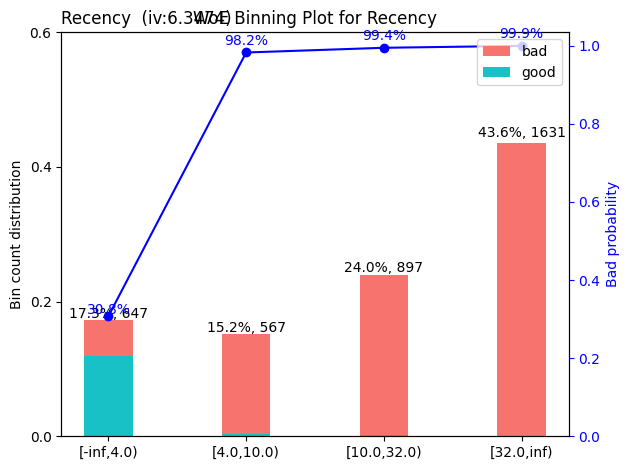

<Figure size 1000x600 with 0 Axes>

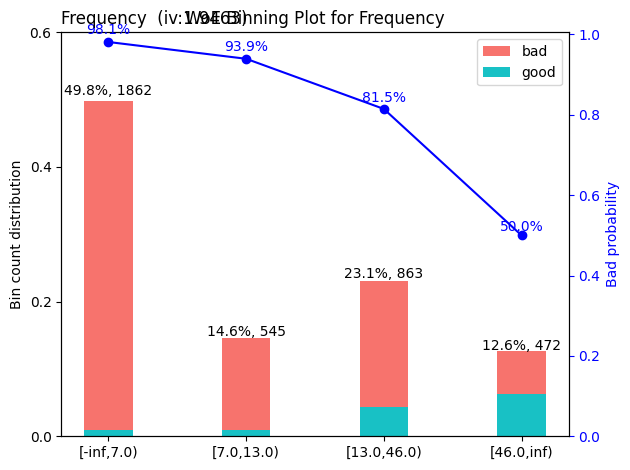

<Figure size 1000x600 with 0 Axes>

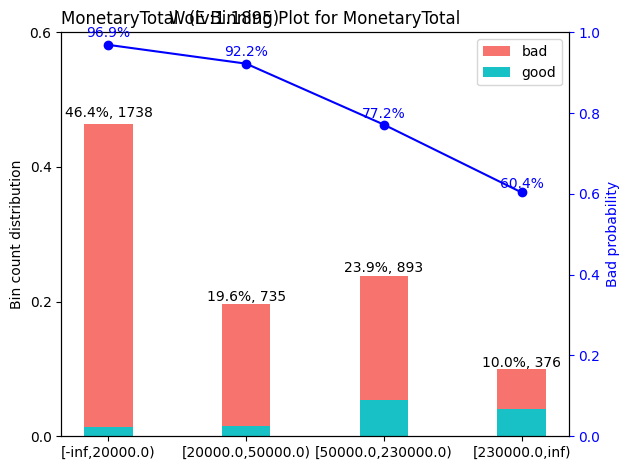

<Figure size 1000x600 with 0 Axes>

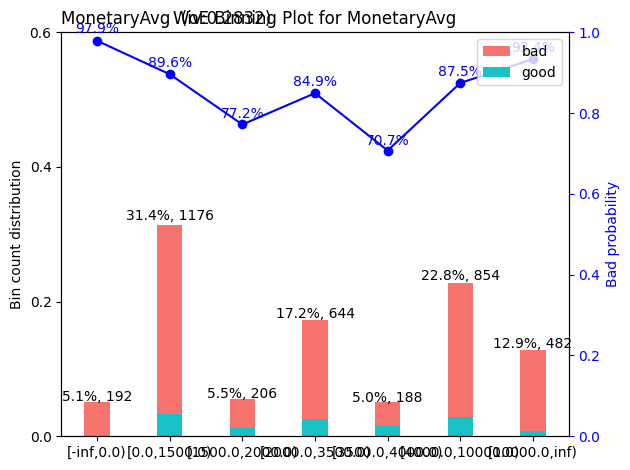

In [44]:
# Plot WoE binning results
for feature in features_for_woe:
    ve.plot_woe_binning(bins, feature)

In [45]:
# Preprocessed data
df.to_csv('../data/cleaned/cleaned_data.csv', index=False)
df_woe.to_csv('../data/cleaned/woe_data.csv', index=False)